In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [26]:
data = pd.read_csv('data_tf-idf.csv')

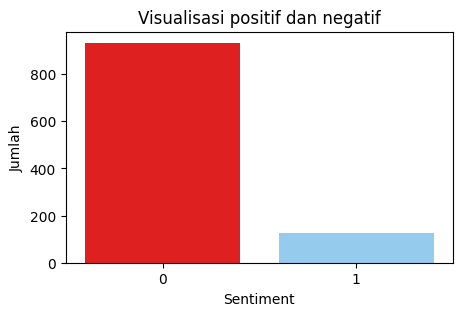

In [27]:
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x='Sentiment', palette={0: 'red', 1: 'lightskyblue'})
plt.title('Visualisasi positif dan negatif')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data['Ulasan'], data['Sentiment'], 
                                                    test_size=0.20, stratify=data['Sentiment'], random_state=0)

In [29]:
#vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
#X_train = vectorizer.fit_transform(X_train)
#X_test = vectorizer.transform(X_test)

In [30]:
#smote = SMOTE(random_state=0)
#X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [31]:
#X_train = X_train.toarray()

In [32]:
#X_test = X_test.toarray()

In [33]:
#nb = GaussianNB()
#cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

#params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
#gscv_nb = GridSearchCV(estimator=nb,
 #                       param_grid=params_NB,
  #                      cv = cv_method,
   #                     verbose = 1, 
    #                    scoring = 'accuracy')

#gscv_nb.fit(X_train, y_train)
#gscv_nb.best_params_

In [34]:
#nb = GaussianNB(var_smoothing=0.0006579332246575676)

In [35]:
#nb.fit(X_train, y_train)

In [36]:
#y_pred_nb = nb.predict(X_test)

In [37]:
#print('----- confusion matrix ------')
#print(confusion_matrix(y_test, y_pred_nb))

#print('----- classification report -----')
#print(classification_report(y_test, y_pred_nb))

In [38]:
#nb_disp = RocCurveDisplay.from_estimator(nb, X_test, y_test)

In [39]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [40]:
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train_vec, y_train)

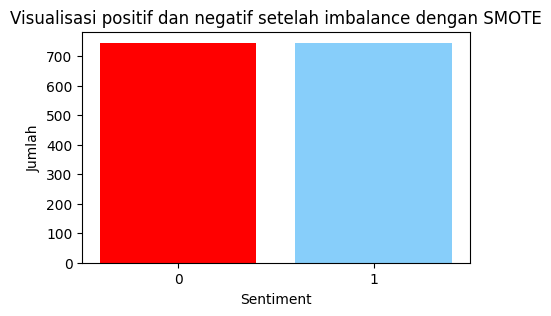

In [47]:
sentimen_counts = y_train_res.value_counts()
plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values, color=['red', 'lightskyblue'])
plt.title('Visualisasi positif dan negatif setelah imbalance dengan SMOTE')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.xticks(sentimen_counts.index, ['0', '1'])
plt.show()

In [42]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_res, y_train_res)

MultinomialNB()

In [43]:
y_pred = naive_bayes.predict(X_test_vec)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred, target_names=['negatif', 'positif'])
print("Akurasi Model Naive Bayes : ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.8726415094339622
Precision:  0.8311713836477987
Recall:  0.8726415094339622
F1-score:  0.8426057125811022

Confusion Matrix :
 [[182   5]
 [ 22   3]]

Laporan Klasifikasi :
               precision    recall  f1-score   support

     negatif       0.89      0.97      0.93       187
     positif       0.38      0.12      0.18        25

    accuracy                           0.87       212
   macro avg       0.63      0.55      0.56       212
weighted avg       0.83      0.87      0.84       212



In [45]:
# Reset index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [50]:
kf = KFold(n_splits=10, random_state=0, shuffle=True)
scores = []
for train_index, test_index in kf.split(X_train_vec):
    X_train_fold, X_test_fold = X_train_vec[train_index], X_train_vec[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    naive_bayes.fit(X_train_fold, y_train_fold)
    score = naive_bayes.score(X_test_fold, y_test_fold)
    scores.append(score)

    print(f"Akurasi setiap fold: {score}")

average_score = sum(scores)/len(scores)
print(f"\nAkurasi rata-rata: {average_score}")

Akurasi setiap fold: 0.8823529411764706
Akurasi setiap fold: 0.8823529411764706
Akurasi setiap fold: 0.8705882352941177
Akurasi setiap fold: 0.8352941176470589
Akurasi setiap fold: 0.8352941176470589
Akurasi setiap fold: 0.9047619047619048
Akurasi setiap fold: 0.8809523809523809
Akurasi setiap fold: 0.8690476190476191
Akurasi setiap fold: 0.9166666666666666
Akurasi setiap fold: 0.9047619047619048

Akurasi rata-rata: 0.8782072829131652
